In [1]:
import torchvision
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data.dataset import Dataset
from PIL import Image
import math
import matplotlib.pyplot as plt

In [4]:
img = torch.arange(4*4*3).view(4,4,3)
img.shape

torch.Size([48])

In [ ]:
img[:,0],img[...,0]

In [ ]:
img[..., 0][img[..., 0]>20] -=1

In [ ]:
img[...,0]

In [ ]:
def activation_func(activation):
    return  nn.ModuleDict([
        ['relu', nn.ReLU(inplace=True)],
        ['leaky_relu', nn.LeakyReLU(negative_slope=0.01, inplace=True)],
        ['selu', nn.SELU(inplace=True)],
        ['none', nn.Identity()]
    ])[activation]

In [ ]:
a= torch.rand(2,1,2,1,2)
print(a)
a.squeeze_()

In [ ]:
nn.Parameter(torch.tensor(3.))

In [ ]:
torch.tensor(3.)

In [ ]:
# tensor now has integrated Variable , so Variable is useless now


In [ ]:
import torch
import torch.nn as nn
from torch.autograd import Function
from torch.autograd import Variable
import torch.nn.init as init

class L2Norm(nn.Module):
    def __init__(self,n_channels, scale):
        super(L2Norm,self).__init__()
        self.n_channels = n_channels
        self.gamma = scale or None
        self.eps = 1e-10
        self.weight = nn.Parameter(torch.Tensor(self.n_channels))
        self.reset_parameters()

    def reset_parameters(self):
        init.constant_(self.weight,self.gamma)

    def forward(self, x):
        norm = x.pow(2).sum(dim=1, keepdim=True).sqrt()+self.eps
        #x /= norm
        x = torch.div(x,norm)
        out = self.weight.unsqueeze(0).unsqueeze(2).unsqueeze(3).expand_as(x) * x
        return out

In [ ]:
L2Norm = L2Norm(4, 20)

In [ ]:
x=torch.rand(1,4,3,3)

In [ ]:
x

In [ ]:
x.pow(2)

In [ ]:
x.pow(2).sum(dim=1, keepdim=True)

In [ ]:
x.pow(2).sum(dim=1, keepdim=True).sqrt()

In [ ]:
norm = x.pow(2).sum(dim=1, keepdim=True).sqrt()
torch.div(x,norm)

In [ ]:
weight = nn.Parameter(torch.Tensor(4))
weight

In [ ]:
weight.unsqueeze(0).unsqueeze(2).unsqueeze(3)

In [ ]:
weight.unsqueeze(0).unsqueeze(2).unsqueeze(3).expand_as(x) * x

In [ ]:
weight.shape

In [2]:
for (i,j) in zip([1,2],[3,4]):
    print(i,j)

1 3
2 4


In [ ]:
x = torch.Tensor(2,3)
x

In [ ]:
x.permute(1,0).reshape(-1)

In [ ]:
x.view(-1)

### view 和 reshape 區別  
***
view : 必須基於連續記憶體因此前面常放.continuous()  
reshape : if you need a copy use clone() if you need the same storage use view()  
 reshape不好控制，盡量用view

model.children : 下一層  
model.modules : 下到最底  
model.named_children  
model.named_modules

In [ ]:
768/1280, 320/720

In [ ]:
17*768/1280, 15*320/720

In [ ]:
(10.2 * 6.666666666666667)**0.5

In [ ]:
70*768/1280, 30*320/720

In [ ]:
(42.0 * 13.333333333333334)**0.5

In [ ]:
268*0.9

In [ ]:
768/100*5

In [ ]:
inputs = torch.randn(1, 3)
"""
new_inputs 的 type 和 device 都會與 inputs 保持一致
"""
new_inputs = inputs.new()
new_inputs = torch.Tensor.new(inputs)

In [ ]:
torch.rand(2,3).numel()

In [ ]:
test = torch.rand(3,3)
print(test)
print(test.gt(0.5))
print(test.le(0.5))

In [ ]:
(i for i in [1,2,3])

In [59]:
    min_dim_to_use = 3*320/100
    max_dim_to_use = 90*320/100
    min_dim_to_use, max_dim_to_use

(9.6, 288.0)

In [60]:
min_max_sizes = np.logspace(np.log2(min_dim_to_use), np.log2(max_dim_to_use), num=6+1, base=2)
print(min_max_sizes)

min_sizes = list(min_max_sizes[0:6])
max_sizes = list(min_max_sizes[1:6+1])
print(tuple(map(int,min_sizes)),tuple(map(int,max_sizes)))

[  9.6         16.92225008  29.82943206  52.58136552  92.68698092
 163.38252815 288.        ]
(9, 16, 29, 52, 92, 163) (16, 29, 52, 92, 163, 287)


In [61]:
min_max_sizes = np.linspace(min_dim_to_use, max_dim_to_use, num=6+1)
print(min_max_sizes)

min_sizes = list(min_max_sizes[0:6])
max_sizes = list(min_max_sizes[1:6+1])
print(min_sizes,max_sizes)

[  9.6  56.  102.4 148.8 195.2 241.6 288. ]
[9.6, 56.0, 102.39999999999999, 148.79999999999998, 195.2, 241.6] [56.0, 102.39999999999999, 148.79999999999998, 195.2, 241.6, 288.0]


In [69]:
rg = min_max_sizes[-1]-min_max_sizes[0]
corrected = rg * ((min_max_sizes-min_max_sizes[0])/rg)**(2) + min_max_sizes[0]
corrected

array([  9.6       ,  17.33333333,  40.53333333,  79.2       ,
       133.33333333, 202.93333333, 288.        ])

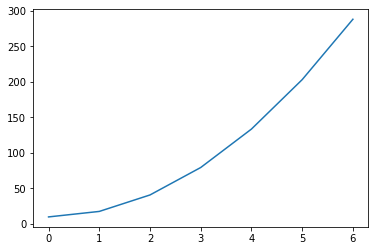

In [70]:
plt.plot(corrected)

In [ ]:
min_max_sizes = np.linspace(min_dim_to_use, max_dim_to_use, num=6+1)
min_max_sizes

In [ ]:
min_sizes = list(min_max_sizes[0:6])
max_sizes = list(min_max_sizes[1:6+1])
min_sizes,max_sizes

In [64]:
#ssd type
min_ratio = 15-5
max_ratio = 90

In [65]:
step = int(math.floor((max_ratio - min_ratio) / (6 - 2)))
step

20

In [66]:
min_sizes = []
max_sizes = []

for ratio in range(min_ratio, max_ratio + 1, step):
    min_sizes.append(300 * ratio / 100.)
    max_sizes.append(300 * (ratio + step) / 100.)
min_sizes,max_sizes

([30.0, 90.0, 150.0, 210.0, 270.0], [90.0, 150.0, 210.0, 270.0, 330.0])

In [67]:
min_size_mul = 4 
max_size_mul = 10

In [68]:
min_sizes = [300 * min_size_mul / 100.] + min_sizes
max_sizes = [300 * max_size_mul / 100.] + max_sizes
min_sizes,max_sizes

([12.0, 30.0, 90.0, 150.0, 210.0, 270.0],
 [30.0, 90.0, 150.0, 210.0, 270.0, 330.0])

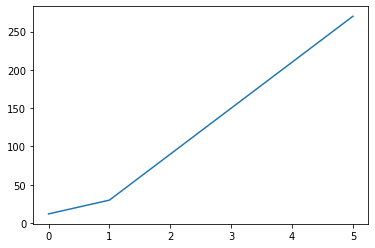

In [78]:
plt.plot([12.0, 30.0, 90.0, 150.0, 210.0, 270.0])

In [76]:
gamma_c = 2
min_max_sizes = np.linspace(min_dim_to_use, max_dim_to_use, num=6+1)
rg = min_max_sizes[-1]-min_max_sizes[0]
corrected = rg * ((min_max_sizes-min_max_sizes[0])/rg)**(gamma_c) + min_max_sizes[0]
corrected
min_sizes = list(corrected[0:6])
max_sizes = list(corrected[1:6+1])

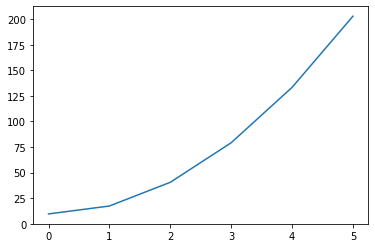

In [77]:
plt.plot(min_sizes)

In [ ]:
        expansion_t = float('mobiledetnet-0.5'.split('nett')[1].split('-')[0]) if 'nett' in config_param.model_name else None


In [83]:
'mobiledetnet-0.5'.split('net')[1].split('-')[0]

''

In [84]:
'mobiledetnet-0.5'.split('-')[1]

'0.5'